In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/content/data.csv',encoding='latin1')
df.head()

/tmp/ipython-input-361669909.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv',encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
r = 102317087
ar = 0.05 * (np.mod(r,7))
br = 0.3 * (np.mod(r,5) + 1)

In [6]:
print(f'{ar.item()}, {br.item()}')

0.25, 0.8999999999999999


In [7]:
x = df['no2'].dropna().values
x

array([17.4,  7. , 28.5, ..., 24.3, 18.1, 18.9])

In [8]:
z_df = x + ar * np.sin(br * x)
z_df

array([17.41198622,  7.00420348, 28.62362485, ..., 24.33021311,
       17.96256839, 18.65897475])

In [9]:
mu = np.mean(z_df)
sigma = np.std(z_df)
lambda_para = 1 / (2 * np.square(sigma))
const = 1 / (sigma * np.sqrt(2 * np.pi))

In [10]:
p_z = const * np.exp( -lambda_para * np.square(z_df - mu))
p_z

array([0.02617875, 0.01708748, 0.02376649, ..., 0.02640245, 0.02640809,
       0.0266479 ])

In [12]:
mu.item()

21.139076714811385

In [13]:
sigma.item()

14.761046776031334

In [14]:
lambda_para.item()

0.002294751653182583

In [15]:
const.item()

0.02702669305602544

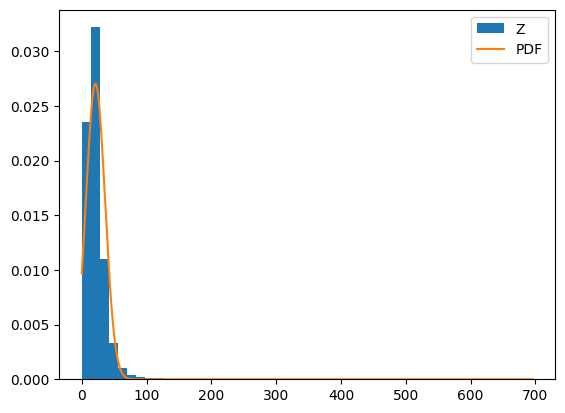

In [16]:
plt.hist(z_df, bins=50, density=True, label='Z')
x = np.linspace(z_df.min(), z_df.max(), 1000)
y = const * np.exp(-lambda_para * (x - mu)**2)
plt.plot(x, y, label='PDF')
plt.legend()
plt.show()